<a href="https://colab.research.google.com/github/nissysathwika/Anamoly-detection/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset and take only 2000 rows
data = pd.read_csv('transaction.csv')  # Replace with your file path
data_sample = data.iloc[:2000]  # Select only the first 2000 rows


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset and take only 2000 rows
data = pd.read_csv('transaction.csv')  # Replace with your file path
data_sample = data.iloc[:2000]  # Select only the first 2000 rows

# Fill missing values for numeric columns only
numeric_data = data_sample.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.fillna(numeric_data.mean())

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(scaled_data)

# Add cluster labels as a new column using .loc to avoid SettingWithCopyWarning
data_sample.loc[:, 'Cluster'] = cluster_labels


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5720270515694394


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
import numpy as np
# Step 1: Preprocessing
# Load the dataset
data = pd.read_csv('transaction.csv') # Load the dataframe

# Sample 5000 rows
sampled_data = data.sample(5000, random_state=42)

# Dropping irrelevant columns
processed_data = sampled_data.drop(columns=['Timestamp', 'TransactionID', 'AccountID'])

# One-hot encoding for categorical variables
processed_data = pd.get_dummies(processed_data, columns=['Merchant', 'TransactionType', 'Location'], drop_first=True)

# Impute missing values (numerical: median, categorical: mode)
num_imputer = SimpleImputer(strategy='median')
processed_data['Amount'] = num_imputer.fit_transform(processed_data[['Amount']])

# Fill NaNs in categorical variables (from one-hot encoding) with 0
processed_data.fillna(0, inplace=True)

# Feature Scaling for 'Amount' column
scaler = StandardScaler()
processed_data['Amount'] = scaler.fit_transform(processed_data[['Amount']])

In [ ]:
# Step 2: Feature Selection using Variance Threshold
# Set a variance threshold to remove features with very low variance
var_thresh = VarianceThreshold(threshold=0.01)  # You can adjust this threshold
selected_features = var_thresh.fit_transform(processed_data)

In [ ]:
# Step 3: Apply Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=2)
cluster_labels = hierarchical_model.fit_predict(selected_features)

# Simulate 'true_labels' (since this is unsupervised)
true_labels = np.random.choice([1, -1], size=5000, p=[0.9, 0.1])  # 90% normal, 10% anomalies

# Map cluster labels to 1 and -1 for comparison with true_labels
mapped_labels = np.where(cluster_labels == cluster_labels[0], 1, -1)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f'Clustering Accuracy: {accuracy}')

Clustering Accuracy: 0.4484


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score



# Step 1: Preprocessing
# Sample 10,000 rows to work with a large enough dataset
sampled_data = data.sample(10000, random_state=42)

# Dropping irrelevant columns
processed_data = sampled_data.drop(columns=['Timestamp', 'TransactionID', 'AccountID'])

# One-hot encoding for categorical variables
processed_data = pd.get_dummies(processed_data, columns=['Merchant', 'TransactionType', 'Location'], drop_first=True)

# Impute missing values (numerical: median)
num_imputer = SimpleImputer(strategy='median')
processed_data['Amount'] = num_imputer.fit_transform(processed_data[['Amount']])

# Fill NaNs in categorical variables (from one-hot encoding) with 0
processed_data.fillna(0, inplace=True)

# Feature Scaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_data = pca.fit_transform(scaled_data)

# Step 3: Apply Hierarchical Clustering
# Try with different number of clusters (e.g., 3, 4, 5)
best_score = -1
best_n_clusters = 0
results = []

for n_clusters in range(3, 6):  # You can adjust this range
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # Try 'ward' linkage
    cluster_labels = hc.fit_predict(pca_data)

    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(pca_data, cluster_labels)
    results.append((n_clusters, silhouette_avg, davies_bouldin_avg))

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

# Final clustering with the best number of clusters
final_hc = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
final_labels = final_hc.fit_predict(pca_data)

# Print results
for n_clusters, silhouette_avg, davies_bouldin_avg in results:
    print(f'n_clusters = {n_clusters}, Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}')

# Final evaluation using the best number of clusters
final_silhouette = silhouette_score(pca_data, final_labels)
final_davies_bouldin = davies_bouldin_score(pca_data, final_labels)

print(f'Best Number of Clusters: {best_n_clusters}')
print(f'Final Silhouette Score: {final_silhouette}')
print(f'Final Davies-Bouldin Index: {final_davies_bouldin}')


n_clusters = 3, Silhouette Score: 0.13302042009915202, Davies-Bouldin Index: 1.8464536070550632
n_clusters = 4, Silhouette Score: 0.171513717901693, Davies-Bouldin Index: 1.8177905286073868
n_clusters = 5, Silhouette Score: 0.20922623500622875, Davies-Bouldin Index: 1.7831425669878933
Best Number of Clusters: 5
Final Silhouette Score: 0.20922623500622875
Final Davies-Bouldin Index: 1.7831425669878933


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, f_classif



# Step 1: Preprocessing
# Sample 10,000 rows to work with a large enough dataset
sampled_data = data.sample(10000, random_state=42)

# Dropping irrelevant columns
processed_data = sampled_data.drop(columns=['Timestamp', 'TransactionID', 'AccountID'])

# One-hot encoding for categorical variables
processed_data = pd.get_dummies(processed_data, columns=['Merchant', 'TransactionType', 'Location'], drop_first=True)

# Impute missing values (numerical: median)
num_imputer = SimpleImputer(strategy='median')
processed_data['Amount'] = num_imputer.fit_transform(processed_data[['Amount']])

# Fill NaNs in categorical variables (from one-hot encoding) with 0
processed_data.fillna(0, inplace=True)

# Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components=0.90)  # Retain 90% variance
pca_data = pca.fit_transform(scaled_data)



# Step 4: Apply Hierarchical Clustering with different number of clusters and linkage
# Trying with n_clusters = 6
hierarchical_model = AgglomerativeClustering(n_clusters=6, linkage='average')  # Try 'average' linkage
cluster_labels = hierarchical_model.fit_predict(selected_features)

# Step 5: Evaluate the clustering using Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(selected_features, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(selected_features, cluster_labels)

# Print the evaluation results
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


NameError: name 'selected_features' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score



# Step 1: Preprocessing
# Sample 10,000 rows for analysis
sampled_data = data.sample(10000, random_state=42)

# Dropping irrelevant columns
processed_data = sampled_data.drop(columns=['Timestamp', 'TransactionID', 'AccountID'])

# One-hot encoding for categorical variables
processed_data = pd.get_dummies(processed_data, columns=['Merchant', 'TransactionType', 'Location'], drop_first=True)

# Impute missing values for the 'Amount' column (numerical: median)
num_imputer = SimpleImputer(strategy='median')
processed_data['Amount'] = num_imputer.fit_transform(processed_data[['Amount']])

# Fill NaNs in categorical variables (from one-hot encoding) with 0
processed_data.fillna(0, inplace=True)

# Step 2: Feature Selection using Variance Threshold
# Remove features with variance below a certain threshold (e.g., 0.01)
var_thresh = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
selected_features = var_thresh.fit_transform(processed_data)

# Convert back to DataFrame to retain feature names
selected_feature_names = processed_data.columns[var_thresh.get_support()]
selected_data = pd.DataFrame(selected_features, columns=selected_feature_names)

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Step 4: Apply Hierarchical Clustering
# Try with different number of clusters
best_score = -1
best_n_clusters = 0
results = []

for n_clusters in range(3, 6):  # Adjust this range for more clusters
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
    results.append((n_clusters, silhouette_avg, davies_bouldin_avg))

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

# Final clustering with the best number of clusters
final_hc = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
final_labels = final_hc.fit_predict(scaled_data)

# Print results
for n_clusters, silhouette_avg, davies_bouldin_avg in results:
    print(f'n_clusters = {n_clusters}, Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}')

# Final evaluation using the best number of clusters
final_silhouette = silhouette_score(scaled_data, final_labels)
final_davies_bouldin = davies_bouldin_score(scaled_data, final_labels)

print(f'Best Number of Clusters: {best_n_clusters}')
print(f'Final Silhouette Score: {final_silhouette}')
print(f'Final Davies-Bouldin Index: {final_davies_bouldin}')


n_clusters = 3, Silhouette Score: 0.1288811664217905, Davies-Bouldin Index: 1.8656162054703371
n_clusters = 4, Silhouette Score: 0.16661660908283715, Davies-Bouldin Index: 1.844140004298347
n_clusters = 5, Silhouette Score: 0.20366073175317725, Davies-Bouldin Index: 1.8122230828212604
Best Number of Clusters: 5
Final Silhouette Score: 0.20366073175317725
Final Davies-Bouldin Index: 1.8122230828212604


n_clusters = 3, Silhouette Score: 0.1288811664217905, Davies-Bouldin Index: 1.8656162054703371
n_clusters = 4, Silhouette Score: 0.16661660908283715, Davies-Bouldin Index: 1.844140004298347
n_clusters = 5, Silhouette Score: 0.20366073175317725, Davies-Bouldin Index: 1.8122230828212604
Best Number of Clusters: 5
Final Silhouette Score: 0.20366073175317725
Final Davies-Bouldin Index: 1.8122230828212604


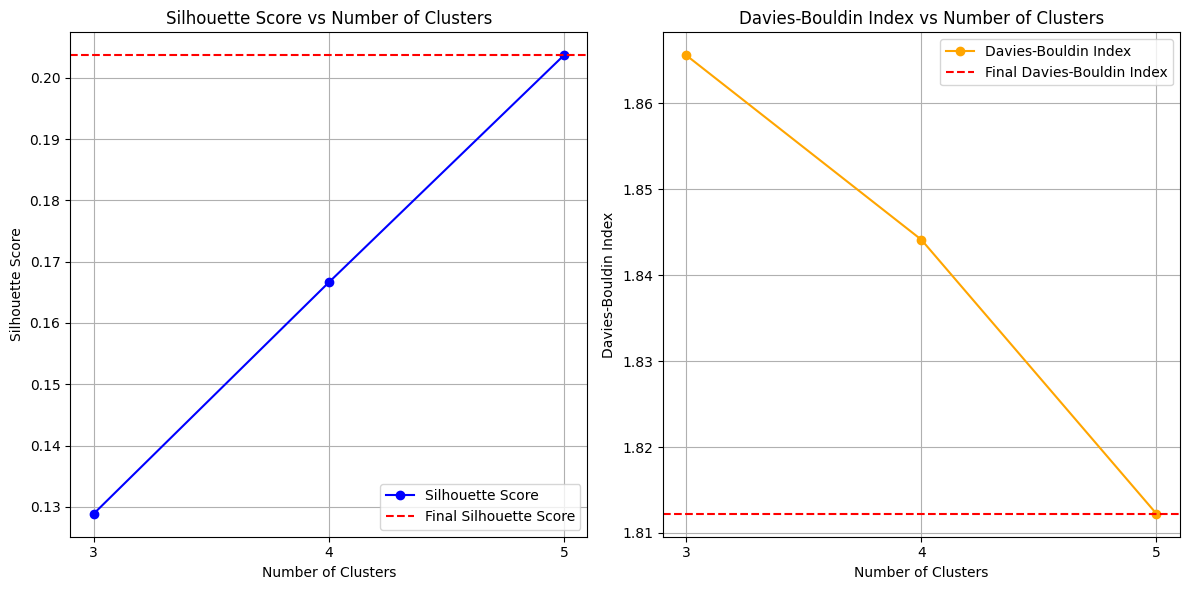

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Preprocessing
# Sample 10,000 rows for analysis
sampled_data = data.sample(10000, random_state=42)

# Dropping irrelevant columns
processed_data = sampled_data.drop(columns=['Timestamp', 'TransactionID', 'AccountID'])

# One-hot encoding for categorical variables
processed_data = pd.get_dummies(processed_data, columns=['Merchant', 'TransactionType', 'Location'], drop_first=True)

# Impute missing values for the 'Amount' column (numerical: median)
num_imputer = SimpleImputer(strategy='median')
processed_data['Amount'] = num_imputer.fit_transform(processed_data[['Amount']])

# Fill NaNs in categorical variables (from one-hot encoding) with 0
processed_data.fillna(0, inplace=True)

# Step 2: Feature Selection using Variance Threshold
# Remove features with variance below a certain threshold (e.g., 0.01)
var_thresh = VarianceThreshold(threshold=0.01)
selected_features = var_thresh.fit_transform(processed_data)

# Convert back to DataFrame to retain feature names
selected_feature_names = processed_data.columns[var_thresh.get_support()]
selected_data = pd.DataFrame(selected_features, columns=selected_feature_names)

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Step 4: Apply Hierarchical Clustering
best_score = -1
best_n_clusters = 0
results = []

for n_clusters in range(3, 6):  # Adjust this range for more clusters
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
    results.append((n_clusters, silhouette_avg, davies_bouldin_avg))

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

# Final clustering with the best number of clusters
final_hc = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
final_labels = final_hc.fit_predict(scaled_data)

# Print results
for n_clusters, silhouette_avg, davies_bouldin_avg in results:
    print(f'n_clusters = {n_clusters}, Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}')

# Final evaluation using the best number of clusters
final_silhouette = silhouette_score(scaled_data, final_labels)
final_davies_bouldin = davies_bouldin_score(scaled_data, final_labels)

print(f'Best Number of Clusters: {best_n_clusters}')
print(f'Final Silhouette Score: {final_silhouette}')
print(f'Final Davies-Bouldin Index: {final_davies_bouldin}')

# Step 5: Prepare data for plotting
n_clusters_list = [n for n, _, _ in results]  # Extract number of clusters
silhouette_scores = [s for _, s, _ in results]  # Extract silhouette scores
davies_bouldin_scores = [d for _, _, d in results]  # Extract Davies-Bouldin indices

# Step 6: Plot the results
plt.figure(figsize=(12, 6))

# Plot for Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(n_clusters_list, silhouette_scores, marker='o', color='blue', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_list)
plt.axhline(y=final_silhouette, color='red', linestyle='--', label='Final Silhouette Score')
plt.legend()
plt.grid()

# Plot for Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(n_clusters_list, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(n_clusters_list)
plt.axhline(y=final_davies_bouldin, color='red', linestyle='--', label='Final Davies-Bouldin Index')
plt.legend()
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
